# Case Study



**Background**

Vivendo is a fast food chain in Brazil with over 200 outlets.
Customers often claim compensation from the company for food poisoning.
The legal team processes these claims. The legal team has offices in four locations.
The legal team wants to improve how long it takes to reply to customers and close claims.
The head of the legal department wants a report on how each location differs in the time it
takes to close claims.

The dataset contains 8 different variables described here:
<table>
  <tr>
    <th>Column name</th>
    <th>Criteria</th>
  </tr>
  <tr>
    <td>claim_id</td>
    <td>Nominal. The unique identifier of the claim.
Missing values are not possible due to the database structure.</td>
  </tr>
    <tr>
    <td>time_to_close</td>
    <td>Discrete. The number of days to close the claim. Any positive
value.
Replace missing values with the overall median time to close.</td>
  </tr>
  <tr>
    <td>claim_amount</td>
    <td>Continuous. The initial claim requested in the currency of Brazil,
rounded to 2 decimal places.
Replace missing values with the overall median claim amount.</td>
  </tr>
    <tr>
    <td>amount_paid</td>
    <td>Continuous. Final amount paid. In the currency of Brazil. Rounded
to 2 decimal places.
Replace missing values with the overall median amount paid.</td>
  </tr>
    <tr>
    <td>location</td>
    <td>Nominal. Location of the claim, one of “RECIFE”, “SAO LUIS”,
“FORTALEZA”, or “NATAL”.
Remove missing values.</td>
  </tr>
    <tr>
    <td>individuals_on_claim</td>
    <td>Discrete. Number of individuals on this claim. Minimum 1 person.
Replace missing value with 0.</td>
  </tr>
    <tr>
    <td>linked_cases</td>
    <td>Nominal. Whether this claim is linked to other cases. Either TRUE or
FALSE.
Replace missing values with FALSE.</td>
  </tr>
    <tr>
    <td>cause</td>
    <td>Nominal. Cause of the food poisoning. One of “vegetable”, “meat”
or “unknown”.
Replace missing values with ‘unknown’.</td>
  </tr>
</table>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('food_claims_2212.csv')

In [3]:
df

,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause
0,1,317,R$ 74474.55,51231.37,RECIFE,15,False,unknown
1,2,195,R$ 52137.83,42111.30,FORTALEZA,12,True,unknown
2,3,183,R$ 24447.2,23986.30,SAO LUIS,10,True,meat
3,4,186,R$ 29006.28,27942.72,FORTALEZA,11,False,meat
4,5,138,R$ 19520.6,16251.06,RECIFE,11,False,vegetable
...,...,...,...,...,...,...,...,...
1995,1996,176,R$ 28982.3,24265.02,RECIFE,10,False,meat
1996,1997,166,R$ 5188.44,4772.77,FORTALEZA,2,True,meat
1997,1998,179,R$ 11975.85,10087.81,RECIFE,4,True,meat
1998,1999,162,R$ 23516.28,23310.24,RECIFE,9,False,meat


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   claim_id              2000 non-null   int64  
 1   time_to_close         2000 non-null   int64  
 2   claim_amount          2000 non-null   object 
 3   amount_paid           1964 non-null   float64
 4   location              2000 non-null   object 
 5   individuals_on_claim  2000 non-null   int64  
 6   linked_cases          1974 non-null   object 
 7   cause                 2000 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 125.1+ KB


In [5]:
df.isna().sum()

claim_id                 0
time_to_close            0
claim_amount             0
amount_paid             36
location                 0
individuals_on_claim     0
linked_cases            26
cause                    0
dtype: int64

In [6]:
df.describe()

,claim_id,time_to_close,amount_paid,individuals_on_claim
count,2000.000000,2000.00000,1964.000000,2000.000000
mean,1000.500000,185.56800,21541.975183,8.049500
std,577.494589,49.16339,12530.156509,4.087347
min,1.000000,76.00000,1516.720000,1.000000
25%,500.750000,158.00000,10995.950000,4.000000
50%,1000.500000,179.00000,20105.700000,8.000000
75%,1500.250000,204.00000,30709.350000,12.000000
max,2000.000000,518.00000,52498.750000,15.000000


In [7]:
df.describe(include='object')

,claim_amount,location,linked_cases,cause
count,2000,2000,1974,2000
unique,2000,4,2,5
top,R$ 74474.55,RECIFE,False,meat
freq,1,885,1493,943


In [8]:
df.amount_paid = df.amount_paid.fillna(df.amount_paid.median())

In [9]:
df.linked_cases = df.linked_cases.fillna('FALSE')

In [10]:
df.isna().sum()

claim_id                0
time_to_close           0
claim_amount            0
amount_paid             0
location                0
individuals_on_claim    0
linked_cases            0
cause                   0
dtype: int64

In [11]:
df.location.value_counts()

RECIFE       885
SAO LUIS     517
FORTALEZA    311
NATAL        287
Name: location, dtype: int64

In [12]:
df.cause.value_counts()

meat          943
unknown       713
vegetable     314
VEGETABLES     16
 Meat          14
Name: cause, dtype: int64

In [13]:
df.claim_amount = df.claim_amount.apply(lambda x: x.replace('R',''))

In [14]:
df.claim_amount = df.claim_amount.apply(lambda x: x.replace('$',''))

In [15]:
df.claim_amount = df.claim_amount.astype(float)

In [16]:
df.claim_amount = df.claim_amount.round(2)

In [17]:
df['claim_amount'] = 'R$ ' + df['claim_amount'].astype(str)
df.claim_amount

0       R$ 74474.55
1       R$ 52137.83
2        R$ 24447.2
3       R$ 29006.28
4        R$ 19520.6
           ...     
1995     R$ 28982.3
1996     R$ 5188.44
1997    R$ 11975.85
1998    R$ 23516.28
1999      R$ 8051.4
Name: claim_amount, Length: 2000, dtype: object

In [18]:
df.cause = df.cause.str.lower()

In [19]:
df.cause = df.cause.str.replace('vegetables','vegetable')
df.cause = df.cause.str.replace(' meat','meat')

In [20]:
df.groupby(['location']).count()

,claim_id,time_to_close,claim_amount,amount_paid,individuals_on_claim,linked_cases,cause
location,,,,,,,
FORTALEZA,311,311,311,311,311,311,311
NATAL,287,287,287,287,287,287,287
RECIFE,885,885,885,885,885,885,885
SAO LUIS,517,517,517,517,517,517,517


## Task 1



## Data Validation


The original data is **2000** rows and **8** columns. The first thing I did was to search for all the missing values to update them as asked on the description. There were only 2 variables that had missing values: 'amount_paid', and 'linked_cases'. All the missing values were replaced as asked in the description. The amount_paid missing values were replaced with the overall median amount paid, and the linked_cases variable with FALSE. Another variable that was not following the description given was 'casuse' to fix this we replaced all the values that were 'vegetables' with the correct form 'vegetable' and also removed the space in ' meat' to fit the description given. Finally to make sure we fit the description of the 'claim_amount' we removed the 'R$' of the entire column and then use the round funtion to fit it to 2 decimals.
The remaining columns were:
- claim_id that had a unique identifier for each row
- time_to close had all positive values and no missing ones
- location had 4 values as expected
- individuals_on_claim had also all their values positive with a minimum of 1


## Task 2

## Data Discovery and Visualization
2. Create a visualization that shows the number of claims in each location. Use the
visualization to:
- State which category of the variable location has the most observations
- Explain whether the observations are balanced across categories of the variable location


For this task what I did was to group the data by location so we can count how many claims we have in each location and be able to determine if they are balanced or not

### Which category of the variable location has the most observations?

In the chart below we can clearly see that the location 'RECIFE' is the one that has the larger amount of claims.
The observations are not very balanced as we see there is a huge difference between the number of claims RECIFE has and the second location that is SAO LUIS.

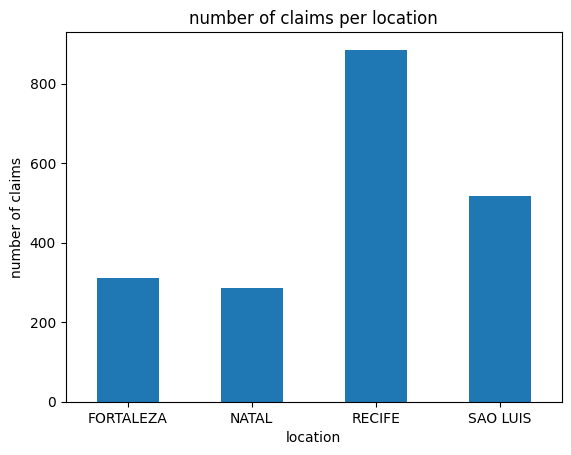

In [21]:
a = df.groupby(['location']).count()
a.claim_id.plot(kind='bar',xlabel='location',ylabel='number of claims',title='number of claims per location')
plt.tick_params(axis='x', rotation=0)
plt.savefig('num_claims_per_location.png')
plt.show()

## Task 3

### How does the time_to_close variable is distributed arround all claims?

As one of our objective is to improve how long it takes to reply customers and close claims we need to look how the values are distributed.Looking at all the different amount of days that takes to close a claim, we can see that the mayority of claims are closed around 175 days after the start. There are some outliers that gets more than 400 days to close a claim but it is very uncommon. It usually takes less than a year to finish the claim. We should focus on those claims that takes longer than a year to resolve and try to find the cause of this. But keeping in mind the claims that take less than a year as they can give a hint on why these resolve quicker.

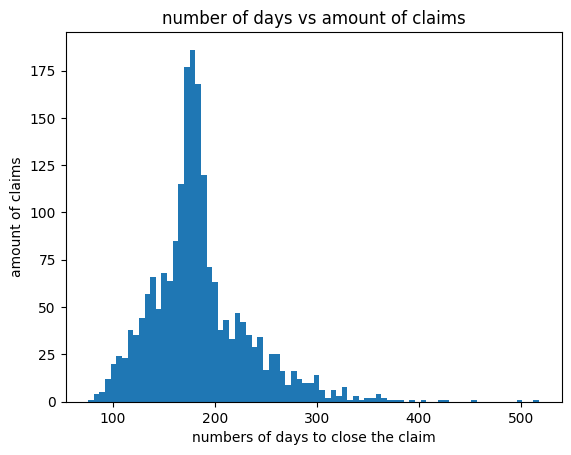

In [22]:
plt.hist(x='time_to_close',data=df,bins=80)
plt.xlabel('numbers of days to close the claim')
plt.ylabel('amount of claims')
plt.title('number of days vs amount of claims')
plt.savefig('num_days_vs_amount_claims.png')
plt.show()

## Task 4

### How does the amount of time to close a claim vary across the different locations?

Finally we can combine both type of information to see how the different values of time_to_close impact on the different locations.

Using a boxplot we can clearly see the different values of the 'time_to_close' variable in each location. Although we know that RECIFE location is the one with the most claims we can clearly see that it also has the highest amount of outliers.
We can also see that they have a very similar interquartile range that suggets that RECIFE location not only have lots of claims that resolve after a year but also a large amount that are resolve rapidly. 

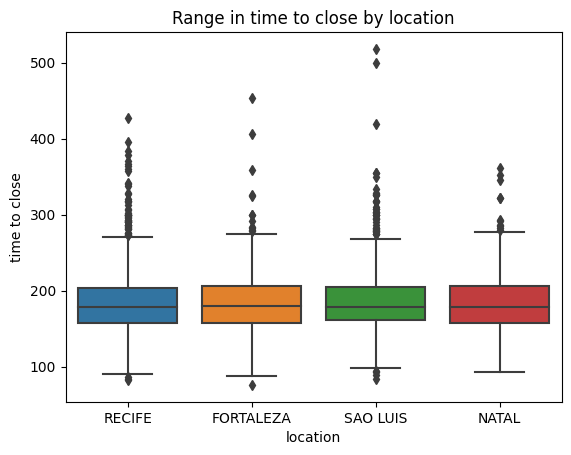

In [23]:
sns.boxplot(data=df,x='location',y='time_to_close')
plt.xlabel('location')
plt.ylabel('time to close')
plt.title('Range in time to close by location')
plt.savefig('time_to_close_by_location.png')
plt.show()

Based on all the information above we can conclude that it is important to look into the claims that take longer than a year to resolve to find the explanation of why this happens but also in the ones that takes less than 100 days as we can have insides of how to resolve the other claims quicker. Further analysis shlould be done to unsderstand if the claim_amount, amount_paid, cause, and the amount of people on each claim have a relationship to the time_to_close.